# Double Pendulum
Created By: Autumn Stephens <br>
Creation Date: 3/26/2023

In [1]:
### Necessary imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp

plt.rcParams["figure.figsize"] = (10, 5)

In this notebook, we simulate the motion of a double pendulum. We know from Eqn. (11.37) and Eqn. (11.38) that

\begin{equation}
U(\phi_1, \phi_2) = (m_1 + m_2) g L_1 (1 - \cos\phi_1) + m_2 g L_2 (1-\cos\phi_2)
\end{equation}

and

\begin{equation}
T = \frac{1}{2} (m_1 + m_2) L_1^2 \dot{\phi}^2 + m_2 L_1 L_2 \dot{\phi_1} \dot{\phi_2} \cos(\phi_1 - \phi_2) + \frac{1}{2} m_2 L_2^2 \dot{\phi_2}^2 .
\end{equation}

Below is the class function that uses Lagrangian mechanics to solve for the motion of a double pendulum.

In [2]:
class LagrangianPendulum():
    
    def __init__(self, m1=1., m2=1., L1=1., L2=1., g=1.):
        
        """
        Initializes a LagrangianPendulum with user-defined properties

        Parameters
        ----------
        m1 : float 
            mass of bob 1
        m2 : float
            mass of bob 2
        L1 : float
            length of pendulum 1
        L2 : float
            length of pendulum 2
        g : float
            gravitational acceleration
        """
        
        ### Initializes pendulum parameters
        self.m1 = m1
        self.m2 = m2
        self.L1 = L1
        self.L2 = L2
        self.g = g
    
    def dy_dt(self, t, y):
        
        """
        Returns the right-hand side of the differential equations for the Lagrangian pendulum.

        Parameters
        ----------
        t : float
            Current time
        y : numpy.ndarray
            A 4-component vector of structure [phi_1, phi_1_dot, phi_2, phi_2_dot]
            
        Returns
        -------
        Array of the form [phi_1, phi_1_dot, phi_2, phi_2_dot]
        """
        
        ### Unpacks vector containing phi and phi dot data
        phi_1, phi_1_dot, phi_2, phi_2_dot = y
        
        ### Solves for phi_1_ddot
        phi_1_ddot = (self.m2 * self.g * np.sin(phi_2) * np.cos(phi_1-phi_2) \
                      - self.m2 * np.sin(phi_1 - phi_2) * (self.L1 * phi_1_dot**2 * np.cos(phi_1-phi_2) \
                      + self.L2 * phi_2_dot**2) \
                      - (self.m1 + self.m2) * self.g * np.sin(phi_1)) \
                      / (self.L1*(self.m1 + self.m2*np.sin(phi_1-phi_2)**2))
        
        ### Solves for phi_2_ddot
        phi_2_ddot = ((self.m1 + self.m2) * (self.L1 * phi_1_dot**2 * np.sin(phi_1-phi_2) \
                     - self.g * np.sin(phi_2) \
                     + self.g * np.sin(phi_1) * np.cos(phi_1 - phi_2)) \
                     + self.m2 * self.L2 * phi_2_dot**2 * np.sin(phi_1 - phi_2) * np.cos(phi_1 - phi_2)) \
                     / (self.L2 * (self.m1 + self.m2 * np.sin(phi_1 - phi_2)**2))

        return [phi_1_dot, phi_1_ddot, phi_2_dot, phi_2_ddot]
    
    def solve_ode(self, t_pts, phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0, abserr=1.0e-9, relerr=1.0e-9):

        """
        Solve the ODE for our double pendulum
        """
        
        ### Unpacks vector containing phi and phi dot data
        y = [phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0] 
        
        ### Solves the IVP and stores it to a class variable
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), y, t_eval=t_pts, atol=abserr, rtol=relerr)
        self.y = solution.y

        return self.y

In [3]:
### Plotting time span
t_start = 0.
t_end = 50.
delta_t = 0.001
t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

### Define system parameters
m1 = 1.
m2 = 1.
L1 = 1.
L2 = 1.
g = 1.

### Instantiate a pendulum 
p1 = LagrangianPendulum(m1=1., m2=1., L1=1., L2=1., g=1.)

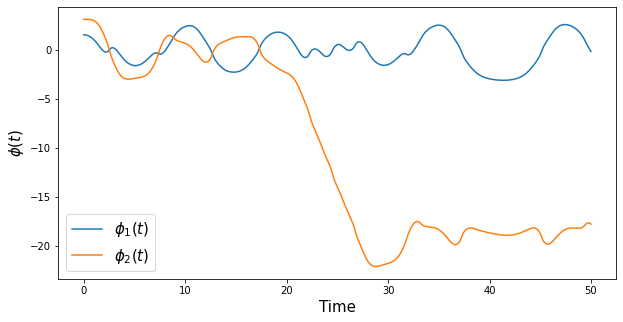

In [4]:
### Initial conditions for pendulum
phi_1_0 = np.pi/2.
phi_1_dot_0 = 0.
phi_2_0 = np.pi
phi_2_dot_0 = 0.

### Solves the ODE and returns the motion of each bob
phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0)

### Plots bob angle data
plt.plot(t_pts, phi_1, label=rf"$\phi_1(t)$")
plt.plot(t_pts, phi_2, label=rf"$\phi_2(t)$")

### Labels
size=15
plt.xlabel("Time", size=size)
plt.ylabel(rf"$\phi (t)$", size=size)
plt.legend(fontsize=size)
plt.show()

Double pendulums are an example of a chaotic system, meaning that small changes in the initial condition yield drastically different long-term behavior. To demonstrate this, we will plot the difference between the positions of two double pendulums with slightly different initial conditions.

In [5]:
### Initial conditions for pendulum
phi_1_0 = np.pi/2.
phi_1_dot_0 = 0.
phi_2_0 = np.pi
phi_2_dot_0 = 0.

### Solves the ODE and returns the motion of each bob
phi_1, phi_1_dot, phi_2, phi_2_dot = p1.solve_ode(t_pts, phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0)

### Initial conditions for pendulum
theta_1_0 = np.pi/2 * 0.9999
theta_1_dot_0 = 0.
theta_2_0 = np.pi
theta_2_dot_0 = 0.

### Solves the ODE and returns the motion of each bob
theta_1, theta_1_dot, theta_2, theta_2_dot = p1.solve_ode(t_pts, theta_1_0, theta_1_dot_0, theta_2_0, theta_2_dot_0)

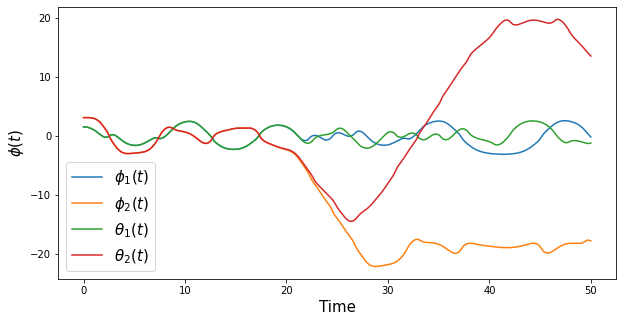

In [6]:
### Plots bob angle data
plt.plot(t_pts, phi_1, label=rf"$\phi_1(t)$")
plt.plot(t_pts, phi_2, label=rf"$\phi_2(t)$")
plt.plot(t_pts, theta_1, label=rf"$\theta_1(t)$")
plt.plot(t_pts, theta_2, label=rf"$\theta_2(t)$")

### Labels
size=15
plt.xlabel("Time", size=size)
plt.ylabel(rf"$\phi (t)$", size=size)
plt.legend(fontsize=size)
plt.show()

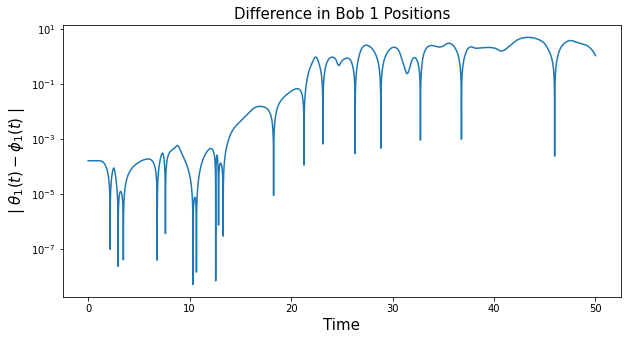

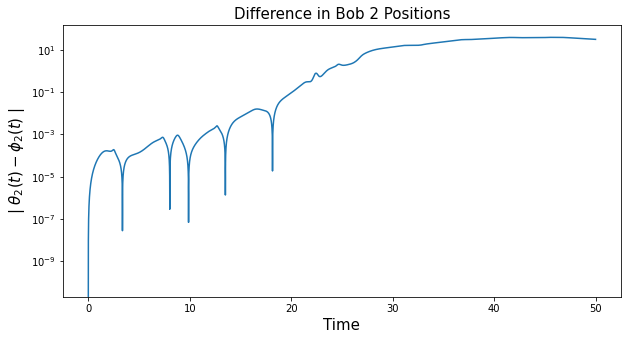

In [7]:
### Calculates the differences between the bob angular positions
diffs_1 = [np.abs(theta-phi) for theta, phi in zip(theta_1, phi_1)]
diffs_2 = [np.abs(theta-phi) for theta, phi in zip(theta_2, phi_2)]

### Plot of bob 1 difference
plt.semilogy(t_pts, diffs_1)
plt.title("Difference in Bob 1 Positions", size=size)
plt.xlabel("Time", size=size)
plt.ylabel(rf"| $\theta_1(t)-\phi_1(t)$ |", size=size)
plt.show()

### Plot of bob 2 difference
plt.semilogy(t_pts, diffs_2)
plt.title("Difference in Bob 2 Positions", size=size)
plt.xlabel("Time", size=size)
plt.ylabel(rf"| $\theta_2(t)-\phi_2(t)$ |", size=size)
plt.show()

As we can see, there is a transient period where both double pendulums are nearly aligned. But, after this transient period has passed, both pendulums diverge in position quickly. This is common characteristic of chaotic systems.

In [8]:
class LagrangianPendulumModified():
    
    def __init__(self, m1=1., m2=1., m3=1., L1=1., L2=1., L3=1., g=1.):
        
        """
        Initializes a LagrangianPendulum with user-defined properties

        Parameters
        ----------
        m1 : float 
            mass of bob 1
        m2 : float
            mass of bob 2
        m3 : float
            mass of bob 3
        L1 : float
            length of pendulum 1
        L2 : float
            length of pendulum 2
        L3 : float
            length of pendulum 3
        g : float
            gravitational acceleration
        """
        
        ### Initializes pendulum parameters
        self.m1 = m1
        self.m2 = m2
        self.m3 = m3
        self.L1 = L1
        self.L2 = L2
        self.L3 = L3
        self.g = g

    def dy_dt(self, t, y):
        
        """
        Returns the right-hand side of the differential equations for the Lagrangian pendulum.

        Parameters
        ----------
        t : float
            Current time
        y : numpy.ndarray
            A 6-component vector of structure [phi_1, phi_1_dot, phi_2, phi_2_dot, phi_3, phi_3_dot]
            
        Returns
        -------
        Array of the form [phi_1, phi_1_dot, phi_2, phi_2_dot, phi_3, phi_3_dot]
        """
        
        ### Unpacks vector containing phi and phi dot data
        phi_1, phi_1_dot, phi_2, phi_2_dot, phi_3, phi_3_dot = y
        
        ### Solves for phi_1_ddot
        phi_1_ddot = (self.m2 * self.g * np.sin(phi_2) * np.cos(phi_1-phi_2) \
                      - self.m2 * np.sin(phi_1 - phi_2) * (self.L1 * phi_1_dot**2 * np.cos(phi_1-phi_2) \
                      + self.L2 * (phi_2_dot**2 - phi_3_dot**2) * np.cos(phi_2-phi_3) \
                      + self.L3 * phi_3_dot**2) \
                      - (self.m1 + self.m2 + self.m3) * self.g * np.sin(phi_1)) \
                      / (self.L1*(self.m1 + self.m2*np.sin(phi_1-phi_2)**2))
        
        ### Solves for phi_2_ddot
        phi_2_ddot = ((self.m1 + self.m2) * (self.L1 * phi_1_dot**2 * np.sin(phi_1-phi_2) \
                     - self.g * np.sin(phi_2) \
                     + self.g * np.sin(phi_1) * np.cos(phi_1 - phi_2)) \
                     + self.m2 * self.L2 * (phi_2_dot**2 - phi_3_dot**2) * np.sin(phi_2 - phi_3) \
                     + self.m3 * self.L3 * phi_3_dot**2 * np.sin(phi_2 - phi_3) * np.cos(phi_2 - phi_3)) \
                     / (self.L2 * (self.m1 + self.m2 * np.sin(phi_1 - phi_2)**2))
        
        ### Solves for phi_3_ddot
        phi_3_ddot = ((self.m2 + self.m3) * (self.L2 * phi_2_dot**2 * np.sin(phi_2-phi_3) \
                     - self.g * np.sin(phi_3) \
                     + self.g * np.sin(phi_2) * np.cos(phi_2 - phi_3)) \
                     + self.m1 * self.L1 * phi_1_dot**2 * np.sin(phi_2 - phi_1) * np.cos(phi_1 - phi_2) \
                     + self.m2 * self.L3 * phi_3_dot**2 * np.sin(phi_2 - phi_3) * np.cos(phi_2 - phi_3)) \
                     / (self.L3 * (self.m2 + self.m3 * np.sin(phi_2 - phi_3)**2))

        return [phi_1_dot, phi_1_ddot, phi_2_dot, phi_2_ddot, phi_3_dot, phi_3_ddot]
    
    def solve_ode(self, t_pts, phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0, abserr=1.0e-9, relerr=1.0e-9):

        """
        Solve the ODE for our double pendulum
        """
        
        ### Unpacks vector containing phi and phi dot data
        y = [phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0, phi_3_0, phi_3_dot_0] 
        
        ### Solves the IVP and stores it to a class variable
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), y, t_eval=t_pts, atol=np.abs(abserr), rtol=relerr)
        self.y = solution.y

        return self.y

In [9]:
### Plotting time span
t_start = 0.
t_end = 50.
delta_t = 0.001
t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

### Define system parameters
m1 = 1.
m2 = 1.
m3 = 1.
L1 = 1.
L2 = 1.
L3 = 1.
g = 1.

### Instantiate a pendulum 
p1_mod = LagrangianPendulumModified(m1=m1, m2=m2, m3=m3, L1=L1, L2=L2, L3=L3, g=1.)

In [10]:
### Initial conditions for pendulum
phi_1_0 = np.pi/2.
phi_1_dot_0 = 0.
phi_2_0 = np.pi
phi_2_dot_0 = 0.
phi_3_0 = np.pi
phi_3_dot_0 = 0.

### Solves the ODE and returns the motion of each bob
phi_1, phi_1_dot, phi_2, phi_2_dot, phi_3, phi_3_dot = p1_mod.solve_ode(t_pts, phi_1_0, phi_1_dot_0, phi_2_0, phi_2_dot_0, phi_3_0, phi_3_dot_0)

/home/idies/miniconda3/envs/py38/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:46: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


I have run out of time to work on the code, so this is where I will be stopping!